# <center>Assignment 1: Understanding Income Inequality Using Nearest Neighbors Model</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6020     | Prof. Chinthaka Pathum Dinesh Herath Gedara  | Abhilash Dikshit| 002702209       |Jan 20, 2024|Winter |



In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
path = '~/GitProjects/Datasets/adult-all.csv'
data = pd.read_csv(path)



In [52]:
display(data)

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [53]:
# Part 1: Data Cleansing

# Handling Missing Values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [54]:
# Handling Outliers (Using IQR method)
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Categorical Variable Encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [55]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [56]:
# Handling Inconsistent Data

# Remove Unnecessary Columns
data = data.drop(['fnlwgt'], axis=1)

In [57]:
display(data)

,Age,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,...,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia,Salary_>50K
2,-0.003389,-0.580344,0.0,0.0,-0.371281,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1.239666,-1.511255,0.0,0.0,-0.371281,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.832093,1.281477,0.0,0.0,-0.371281,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.086260,1.746933,0.0,0.0,-0.371281,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1.156795,-0.580344,0.0,0.0,0.891437,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,0.825314,1.746933,0.0,0.0,-0.371281,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48836,-0.417741,1.281477,0.0,0.0,-0.371281,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48837,0.079481,1.281477,0.0,0.0,-1.381455,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48838,2.151239,-0.580344,0.0,0.0,-0.371281,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
# Part 2: Nearest Neighbors Model

# Feature Selection
X = data.drop('Salary_>50K', axis=1)
y = data['Salary_>50K']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [60]:
#conda install --update-all scikit-learn

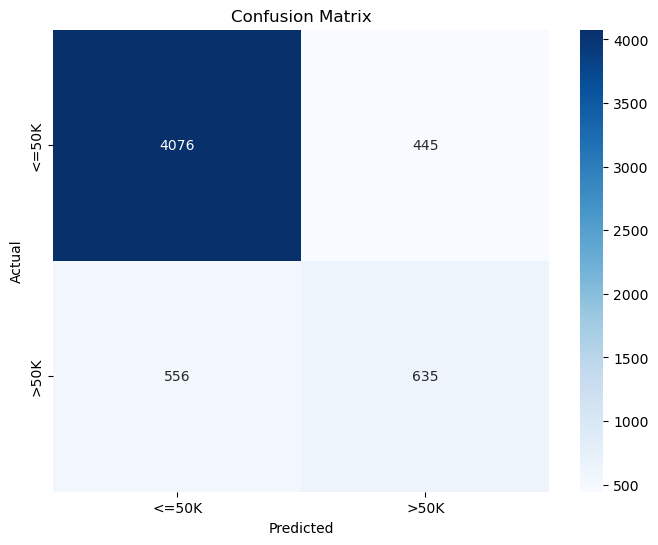

Accuracy of the KNN model: 0.8247549019607843


In [61]:
# Evaluate Model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy of the KNN model: {accuracy}")

## Hyperparameter Tuning

In [62]:
# Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

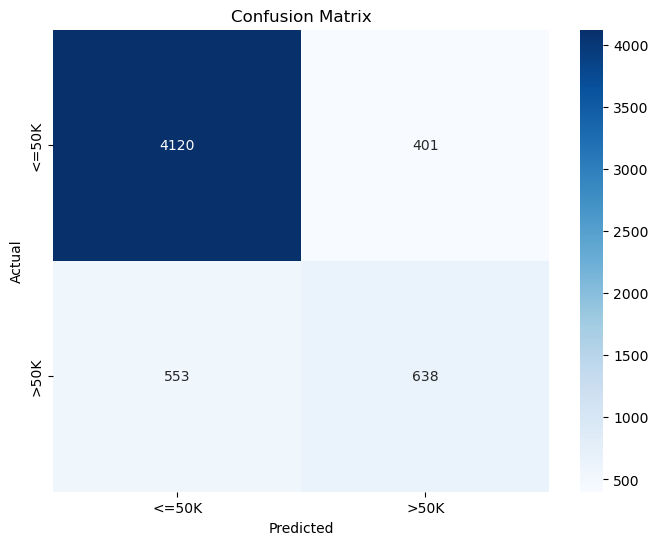

Accuracy of the KNN model with k=11: 0.832983193277311


In [63]:
# Hyperparameter Tuning with Grid Search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Add more values for larger search space
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameter value
best_k = grid_search.best_params_['n_neighbors']

# Nearest Neighbors Model with Best Hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Evaluate Model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy of the KNN model with k={best_k}: {accuracy}")